In [1]:
%matplotlib inline
import pylab as pl
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
pl.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

In [2]:
u = "C:\\Users\\XIAOYU\\Desktop\\data\\"
merge_cont = np.load(u+"5 number of data points\\ER3_extension.npy")

In [3]:
d0 = [x[0] for x in merge_cont]
d1 = [x[1] for x in merge_cont]
d2 = [x[2] for x in merge_cont]
d3 = [x[3] for x in merge_cont]
d4 = [x[4] for x in merge_cont]

d5 = [x[5] for x in merge_cont]
d6 = [x[6] for x in merge_cont]
d7 = [x[7] for x in merge_cont]
d8 = [x[8] for x in merge_cont]
d9 = [x[9] for x in merge_cont]

d10 = [x[10] for x in merge_cont]
d11 = [x[11] for x in merge_cont]
d12 = [x[12] for x in merge_cont]
d13 = [x[13] for x in merge_cont]
d14 = [x[14] for x in merge_cont]

d15 = [x[15] for x in merge_cont]
d16 = [x[16] for x in merge_cont]
d17 = [x[17] for x in merge_cont]
d18 = [x[18] for x in merge_cont]
d19 = [x[19] for x in merge_cont]

d20 = [x[20] for x in merge_cont]
d21 = [x[21] for x in merge_cont]
d22 = [x[22] for x in merge_cont]
d23 = [x[23] for x in merge_cont]
d24 = [x[24] for x in merge_cont]

d25 = [x[25] for x in merge_cont]
d26 = [x[26] for x in merge_cont]
d27 = [x[27] for x in merge_cont]
d28 = [x[28] for x in merge_cont]
d29 = [x[29] for x in merge_cont]

In [4]:
to_fit = pd.DataFrame({'p':d0,'q':d1,
                       'P1':d2,'Q1':d3,'M1':d4,
                       'P2':d6,'Q2':d7,'M2':d8,
                       'P3':d10,'Q3':d11,'M3':d12,
                       'P4':d14,'Q4':d15,'M4':d16,
                       'P5':d18,'Q5':d19,'M5':d20,
                       'P6':d22,'Q6':d23,'M6':d24,
                       'P7':d26,'Q7':d27,'M7':d28})

In [5]:
p_cont,q_cont = to_fit.p,to_fit.q
P1_cont,P2_cont,P3_cont,P4_cont,P5_cont,P6_cont,P7_cont = to_fit.P1,to_fit.P2,to_fit.P3,to_fit.P4,to_fit.P5,to_fit.P6,to_fit.P7
Q1_cont,Q2_cont,Q3_cont,Q4_cont,Q5_cont,Q6_cont,Q7_cont = to_fit.Q1,to_fit.Q2,to_fit.Q3,to_fit.Q4,to_fit.Q5,to_fit.Q6,to_fit.Q7
M1_cont,M2_cont,M3_cont,M4_cont,M5_cont,M6_cont,M7_cont = to_fit.M1,to_fit.M2,to_fit.M3,to_fit.M4,to_fit.M5,to_fit.M6,to_fit.M7

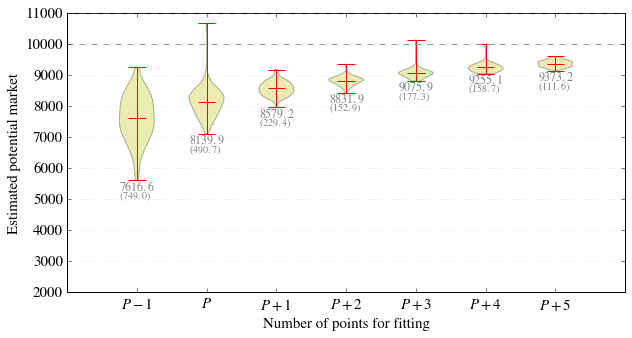

In [7]:
fig = pl.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.axhline(10000,color='gray',ls = '--', lw = 1)
ax1.set_ylim([2000,11000])
ax1.set_ylabel('Estimated potential market',fontsize = 15)
ax1.set_xlabel('Number of points for fitting',fontsize = 15)
ax1.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',alpha=0.5)

data1 = [M1_cont,M2_cont,M3_cont,M4_cont,M5_cont,M6_cont,M7_cont]   
ax1.violinplot(data1,showmedians=False,showmeans=True,showextrema=True,widths = 0.5,positions=np.arange(1,8)-2)
#ax1.boxplot(data1,notch=1,vert =1,whis=0,widths = 0.3,positions = np.arange(1,8)-2)
for i in [-1, 0, 1, 2, 3, 4, 5]:
    ax1.text(i-0.25,np.min(data1[i+1])-200,r'$%.1f$'%np.mean(data1[i+1]),
             fontsize=12, verticalalignment='center',color='k',alpha=0.5)
    ax1.text(i-0.25,np.min(data1[i+1])-500,r'$(%.1f$)'%np.std(data1[i+1]),
             fontsize=10, verticalalignment='center',color='k',alpha=0.5)
    
pl.setp(ax1,xticks=[-1,0,1,2,3,4,5],xticklabels=['$P-1$','$P$','$P+1$','$P+2$','$P+3$','$P+4$','$P+5$'])


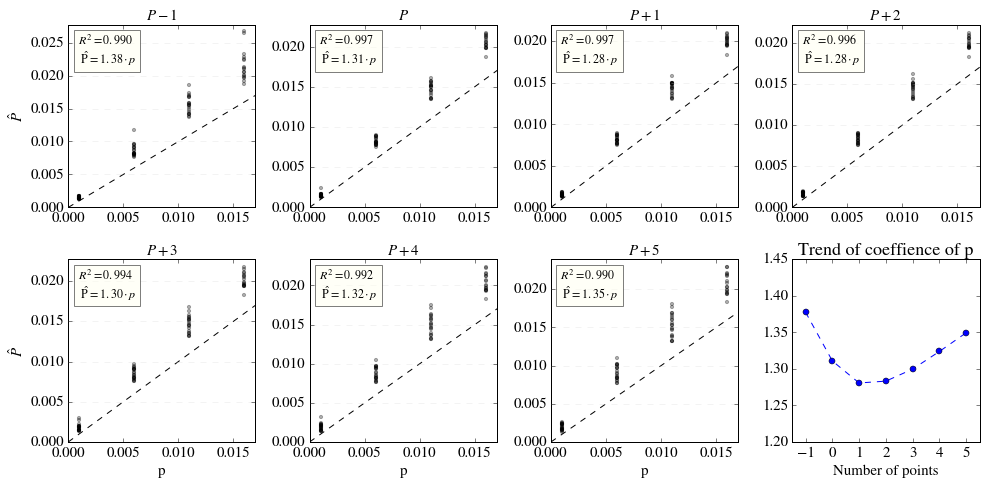

In [10]:
fig = pl.figure(figsize = (14,7))
Y_cont = [P1_cont,P2_cont,P3_cont,P4_cont,P5_cont,P6_cont,P7_cont]
title_cont = ['$P-1$','$P$','$P+1$','$P+2$','$P+3$','$P+4$','$P+5$']
a_cont = []
r2_cont = []
for i in range(7):
    ax = fig.add_subplot(2,4,i+1)
    X_data = p_cont
    Y_data = Y_cont[i]
    to_fit = pd.DataFrame({'X':X_data,'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared
    a_cont.append(a)
    r2_cont.append(r2)
    
    ax.scatter(X_data,Y_data,c='k',s=10,marker='o',alpha=0.3)   
    ax.plot(np.arange(0,np.max(X_data)+0.005,0.001),np.arange(0,np.max(X_data)+0.005,0.001),'k--',lw = 1)
    textstr = '$R^2 = %.3f$ \n $\mathrm{\hat P} = %.2f\cdot p$'%(r2,a)
    props = dict(facecolor = 'ivory',alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
    ax.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',alpha=0.5)
    
    ax.set_xticks([0, 0.005, 0.01, 0.015, 0.02, 0.025])
    ax.set_title('%s'%title_cont[i],fontsize=15,style='italic')
    ax.set_xlim([0,np.max(X_data)+0.001])
    ax.set_ylim([0,np.max(Y_data)+0.001])

    if i == 0 or i == 4:
        ax.set_ylabel(r'$\hat P$',fontsize=15)
    if i >= 4:
        ax.set_xlabel(r'p',fontsize=15) 
        
ax = fig.add_subplot(2,4,8)
ax.plot([-1,0,1,2,3,4,5],a_cont,'bo--')
ax.set_title('Trend of coeffience of p')
ax.set_xlim([-1.5,5.5])
ax.set_ylim([1.2,1.45])
ax.set_xlabel('Number of points',fontsize=15)

pl.tight_layout()

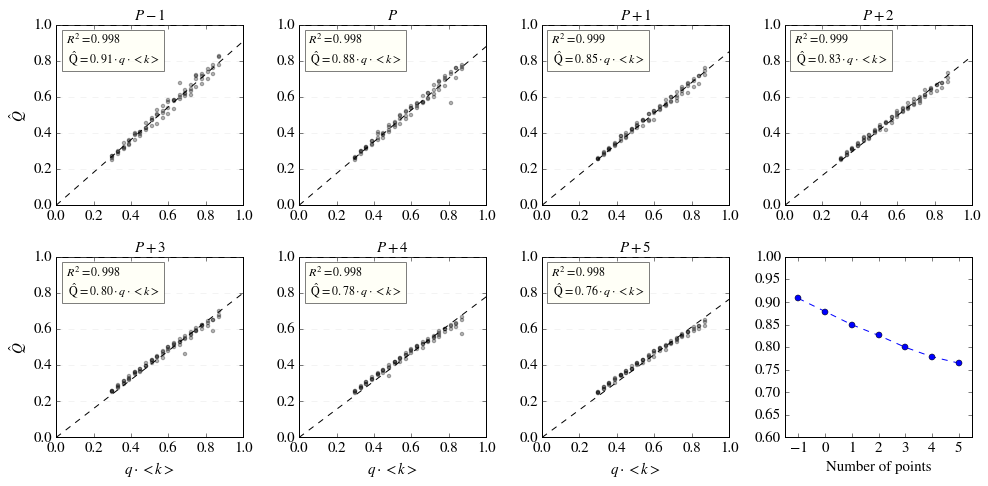

In [12]:
fig = pl.figure(figsize=(14,7))
c_cont = ['blueviolet','cyan','gold','coral','k','m','b']
title_cont = ['$P-1$','$P$','$P+1$','$P+2$','$P+3$','$P+4$','$P+5$']
Y_cont = [Q1_cont,Q2_cont,Q3_cont,Q4_cont,Q5_cont,Q6_cont,Q7_cont]
a_cont = []

for j in range(7):
    ax = fig.add_subplot(2,4,j+1)
    X_data = q_cont*6
    Y_data = Y_cont[j]
    to_fit = pd.DataFrame({'X':X_data,'Y':Y_data})
    results = smf.ols('Y ~ X-1', data=to_fit).fit()
    a = results.params['X']
    r2 = results.rsquared
    a_cont.append(a)
    
    textstr = '$R^2 = %.3f$ \n $\mathrm{\hat Q} = %.2f\cdot q\cdot<k>$'%(r2,a)
    props = dict(facecolor = 'ivory',alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
    ax.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',alpha=0.5)
    ax.set_xlim([0,1])#ax.set_xlim([np.min(X_data),np.max(X_data)])
    ax.set_ylim([0,1])
    ax.scatter(X_data,Y_data,c = 'k',marker='o',s=12,alpha=0.3)
    ax.plot([0,1],[0,1*a],'k--',lw = 1)
    ax.set_title(title_cont[j],fontsize = 15,style='italic')
    if j >= 4: 
        ax.set_xlabel('$q \cdot <k>$',fontsize=15)
    if j == 0 or j == 4:
        ax.set_ylabel('$\hatQ$',fontsize=15)
        
ax = fig.add_subplot(2,4,8)
ax.plot([-1,0,1,2,3,4,5],a_cont,'bo--')
ax.set_xlim([-1.5,5.5])
ax.set_ylim([0.6,1])
ax.set_xlabel('Number of points',fontsize=15)
        
pl.tight_layout()